# **Non-linear Equation and Synthetic Data**

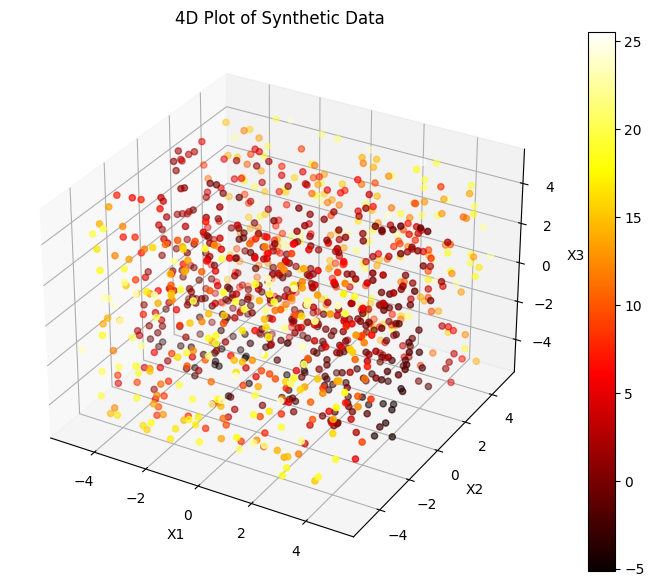

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)

# Generating synthetic data
X = np.random.rand(1000, 3) * 10 - 5
y = np.sin(X[:, 0]) + X[:, 1]**2 - np.log1p(np.exp(-X[:, 2]))

# 4D plot function
def plot_4d(X, y):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    img = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.hot())
    fig.colorbar(img)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    plt.title('4D Plot of Synthetic Data')
    plt.show()

plot_4d(X, y)


# **Neural Network Architecture**

In [2]:
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def initialize_parameters(input_size, hidden_size, output_size):
    W1 = np.random.randn(input_size, hidden_size) * 0.1
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, hidden_size) * 0.1
    b2 = np.zeros((1, hidden_size))
    W3 = np.random.randn(hidden_size, output_size) * 0.1
    b3 = np.zeros((1, output_size))
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3}


# **Model training and performing Backpropagation**

In [3]:
def forward_pass(X, params):
    Z1 = np.einsum('ij,jk->ik', X, params['W1']) + params['b1']
    A1 = relu(Z1)
    Z2 = np.einsum('ij,jk->ik', A1, params['W2']) + params['b2']
    A2 = relu(Z2)
    Z3 = np.einsum('ij,jk->ik', A2, params['W3']) + params['b3']
    return Z1, A1, Z2, A2, Z3

def compute_loss(Y, Y_hat):
    return np.mean((Y - Y_hat)**2)

def backward_pass(X, Y, params, Z1, A1, Z2, A2, Z3):
    m = X.shape[0]
    dZ3 = 2 * (Z3 - Y) / m
    dW3 = np.einsum('ij,ik->jk', A2, dZ3)
    db3 = np.sum(dZ3, axis=0, keepdims=True)

    dA2 = np.einsum('ij,jk->ik', dZ3, params['W3'].T)
    dZ2 = dA2 * relu_derivative(Z2)
    dW2 = np.einsum('ij,ik->jk', A1, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.einsum('ij,jk->ik', dZ2, params['W2'].T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.einsum('ij,ik->jk', X, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2, "dW3": dW3, "db3": db3}
    return grads

def update_parameters(params, grads, learning_rate):
    params['W1'] -= learning_rate * grads['dW1']
    params['b1'] -= learning_rate * grads['db1']
    params['W2'] -= learning_rate * grads['dW2']
    params['b2'] -= learning_rate * grads['db2']
    params['W3'] -= learning_rate * grads['dW3']
    params['b3'] -= learning_rate * grads['db3']
    return params


# **Training Loop and Visualization**

Epoch 0, Loss: 114.08798209986713
Epoch 100, Loss: 12.765002807312474
Epoch 200, Loss: 6.925643709470473
Epoch 300, Loss: 4.617217531521315
Epoch 400, Loss: 3.547477245717628
Epoch 500, Loss: 2.929912096558242
Epoch 600, Loss: 2.5694972481680463
Epoch 700, Loss: 2.3224160858343765
Epoch 800, Loss: 2.0858670644243196
Epoch 900, Loss: 1.9115029810763455


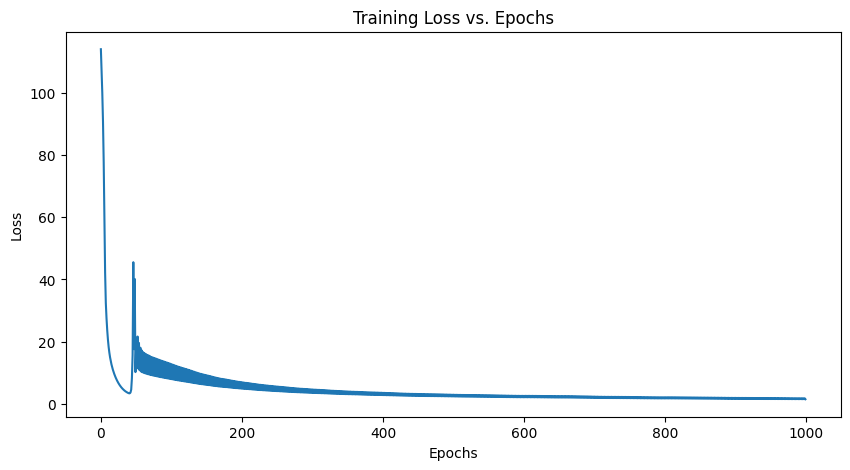

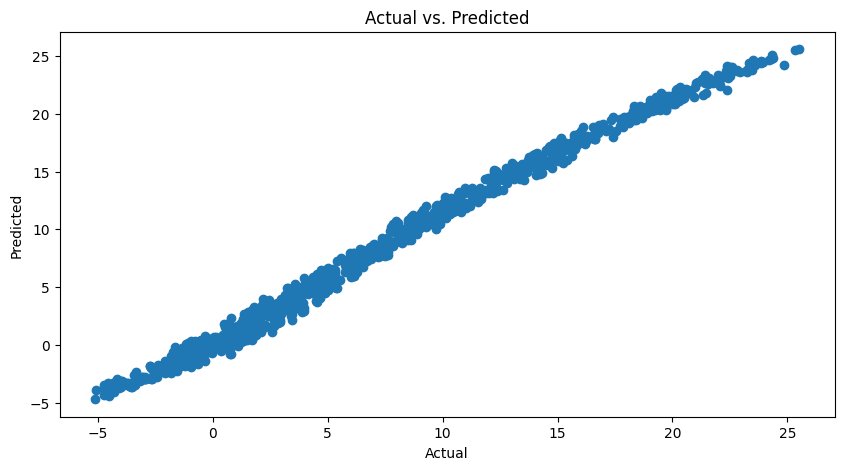

In [4]:
epochs = 1000
learning_rate = 0.01
hidden_size = 64
input_size = X.shape[1]
output_size = 1

params = initialize_parameters(input_size, hidden_size, output_size)
loss_history = []

for epoch in range(epochs):
    Z1, A1, Z2, A2, Z3 = forward_pass(X, params)
    loss = compute_loss(y.reshape(-1, 1), Z3)
    loss_history.append(loss)

    grads = backward_pass(X, y.reshape(-1, 1), params, Z1, A1, Z2, A2, Z3)
    params = update_parameters(params, grads, learning_rate)

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs. Epochs')
plt.show()

# Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.scatter(y, Z3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()
